In [61]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [62]:
df = pd.read_csv('..\\..\\Dataset\\testes\\dataset_casos_mensais_sem_municipio_sem_sp.csv', 
                    parse_dates=['dt_notificacao'],
                    usecols=['dt_notificacao', 'qntd_casos', 'temp_media_mensal', 'precipitacao_total_mensal']
                )
df = df.sort_values('dt_notificacao')

df_sp = df[
       
        (df['dt_notificacao'] >= '2018-01-01') 
        & (df['dt_notificacao'] <= '2023-12-01')

        ]

In [63]:
df_sp.set_index('dt_notificacao', inplace=True)

df_sp.fillna(method='ffill', inplace=True)

C:\Users\kenzo\AppData\Local\Temp\ipykernel_34408\1156336966.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp.fillna(method='ffill', inplace=True)
C:\Users\kenzo\AppData\Local\Temp\ipykernel_34408\1156336966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp.fillna(method='ffill', inplace=True)


In [64]:
# Split the dataset into training and testing
train_size = int(len(df_sp) * 0.7)
train = df_sp.iloc[:train_size+1]
train2 = df_sp.iloc[:train_size+2]
test = df_sp.iloc[train_size+1:]

In [65]:
y_train = train['qntd_casos']
y_test = test['qntd_casos']
y_train2 = train2['qntd_casos']
exog_train = train[['temp_media_mensal']]
exog_test = test[['temp_media_mensal']]

Estatística ADF: -4.605835650122819
p-valor: 0.00012600804591607787
ACF:
PACF:


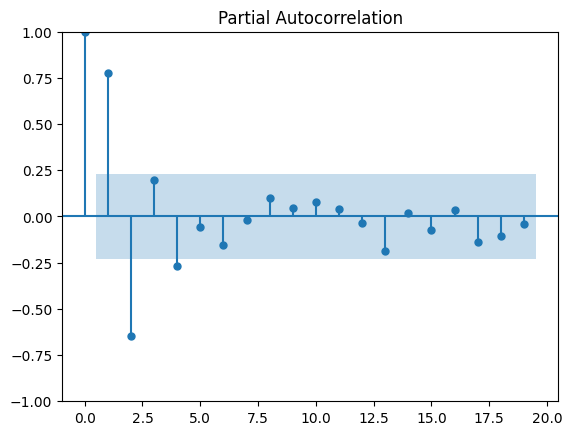

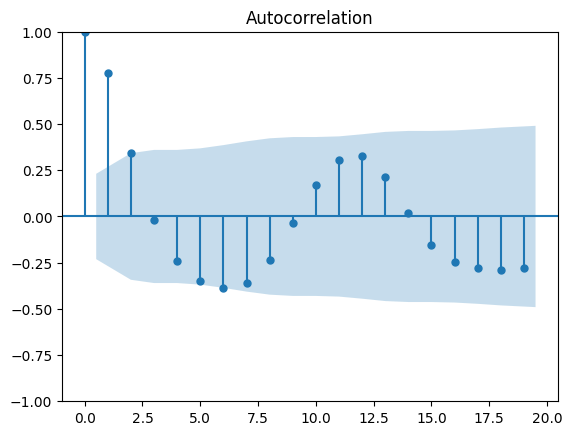

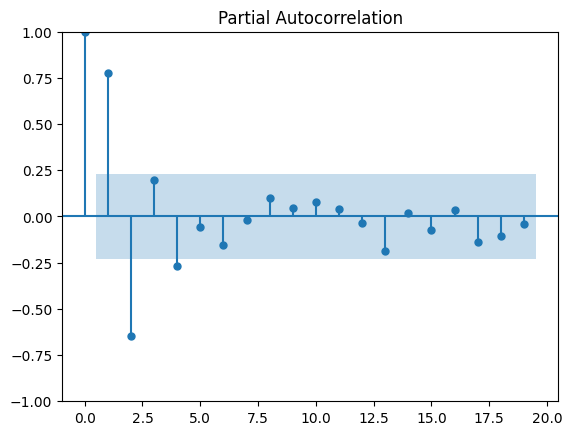

In [66]:
result = adfuller(df_sp['qntd_casos'])

print(f'Estatística ADF: {result[0]}')
print(f'p-valor: {result[1]}')
print('ACF:')
plot_acf(df_sp['qntd_casos'])
print("PACF:")
plot_pacf(df_sp['qntd_casos'])

In [67]:
model = sm.tsa.statespace.SARIMAX(
    y_train,
    exog=exog_train,
    order=(2, 1, 2), # 1, 2, 1
    seasonal_order=(1, 1, 1, 12), 
    initialization="approximate_diffuse"
)

results = model.fit()

pred = results.get_forecast(steps=len(exog_test), exog=exog_test)

y_pred_test = pred.predicted_mean

C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


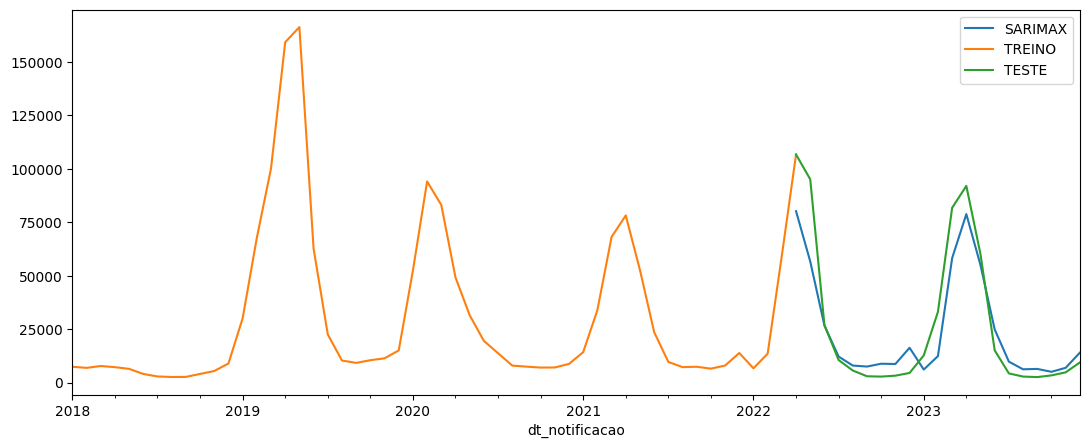

In [68]:
fig, ax = plt.subplots(figsize=(13, 5))

pred.predicted_mean.plot(ax=ax, label='SARIMAX')
y_train2.plot(ax=ax, label='TREINO')
y_test.plot(ax=ax, label='TESTE')

ax.legend()

In [69]:
MSE = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
RMSE = root_mean_squared_error(y_pred=y_pred_test, y_true=y_test)
MAE = mean_absolute_error(y_pred=y_pred_test, y_true=y_test)
MAPE = mean_absolute_percentage_error(y_pred=y_pred_test, y_true=y_test)
r2 = r2_score(y_pred=y_pred_test, y_true=y_test)
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")
print(f"r2: {r2}")

MSE: 182035380.09279105
RMSE: 13492.048772991857
MAE: 9379.928902519816
MAPE: 0.8099831897868532
r2: 0.8513629002571454
